In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd()
print(path)

C:\Users\Shivansh\TensorFlow


In [14]:
data = pd.read_json(r'C:\Users\Shivansh\TensorFlow\Datasets\Sarcasm_Headlines_Dataset.json',lines = True)

In [15]:
data.head(10)

,article_link,headline,is_sarcastic
0,https://www.theonion.com/thirtysomething-scien...,thirtysomething scientists unveil doomsday clo...,1
1,https://www.huffingtonpost.com/entry/donna-edw...,dem rep. totally nails why congress is falling...,0
2,https://www.huffingtonpost.com/entry/eat-your-...,eat your veggies: 9 deliciously different recipes,0
3,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar from getting t...,1
4,https://www.theonion.com/mother-comes-pretty-c...,mother comes pretty close to using word 'strea...,1
5,https://www.huffingtonpost.com/entry/my-white-...,my white inheritance,0
6,https://www.huffingtonpost.com/entry/5-ways-to...,5 ways to file your taxes with less stress,0
7,https://www.theonion.com/richard-bransons-glob...,richard branson's global-warming donation near...,1
8,https://politics.theonion.com/shadow-governmen...,shadow government getting too large to meet in...,1
9,https://www.huffingtonpost.comhttp://pubx.co/6...,lots of parents know this scenario,0


In [17]:
articleLinks = data["article_link"]
headLines = data["headline"]
labels = data["is_sarcastic"]

In [18]:
len(articleLinks)

28619

In [29]:
trainingSize = 20000
oov = "<oov>"
vocabSize = 10000
embeddingDim = 16 
trunc = 'post'
padType = 'post'
maxLength = 32

trainLines = headLines[0:trainingSize]
trainLabels = labels[0:trainingSize]

testLines = headLines[trainingSize:]
testLabels = labels[trainingSize:]

In [33]:
tokenizer = Tokenizer( num_words = vocabSize , oov_token = oov )
tokenizer.fit_on_texts( trainLines )
word_index = tokenizer.word_index

trainSequences = tokenizer.texts_to_sequences(trainLines)
trainPadding = pad_sequences(trainSequences,maxlen = maxLength , truncating = trunc , padding= padType)

testSequences = tokenizer.texts_to_sequences(testLines)
testPadding = pad_sequences(testSequences,maxlen = maxLength , truncating = trunc , padding = padType)

In [44]:
model = keras.Sequential([
    keras.layers.Embedding(vocabSize , embeddingDim , input_length = maxLength),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(24,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')    
])

model.compile( optimizer  = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [46]:
numEpochs = 20
history = model.fit( trainPadding ,trainLabels , epochs = 20 , validation_data = (testPadding,testLabels),verbose = 2)

Epoch 1/20
625/625 - 1s - loss: 0.5597 - accuracy: 0.7255 - val_loss: 0.3864 - val_accuracy: 0.8386
Epoch 2/20
625/625 - 1s - loss: 0.3145 - accuracy: 0.8706 - val_loss: 0.3306 - val_accuracy: 0.8552
Epoch 3/20
625/625 - 1s - loss: 0.2389 - accuracy: 0.9067 - val_loss: 0.3312 - val_accuracy: 0.8533
Epoch 4/20
625/625 - 1s - loss: 0.1939 - accuracy: 0.9278 - val_loss: 0.3520 - val_accuracy: 0.8507
Epoch 5/20
625/625 - 1s - loss: 0.1627 - accuracy: 0.9404 - val_loss: 0.3774 - val_accuracy: 0.8399
Epoch 6/20
625/625 - 1s - loss: 0.1384 - accuracy: 0.9517 - val_loss: 0.4018 - val_accuracy: 0.8419
Epoch 7/20
625/625 - 1s - loss: 0.1199 - accuracy: 0.9578 - val_loss: 0.4355 - val_accuracy: 0.8343
Epoch 8/20
625/625 - 1s - loss: 0.1039 - accuracy: 0.9640 - val_loss: 0.4748 - val_accuracy: 0.8303
Epoch 9/20
625/625 - 1s - loss: 0.0909 - accuracy: 0.9700 - val_loss: 0.5219 - val_accuracy: 0.8269
Epoch 10/20
625/625 - 1s - loss: 0.0806 - accuracy: 0.9736 - val_loss: 0.5680 - val_accuracy: 0.8225

In [54]:
def plot( history , parameter):
    plt.plot(history.history[parameter])
    plt.plot(history.history["val_"+parameter])
    plt.xlabel("Epochs")
    plt.ylabel(parameter)
    plt.legend([parameter,"val_"+parameter])
    plt.show()
    

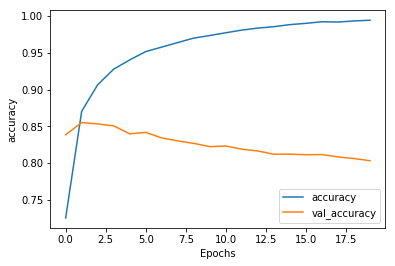

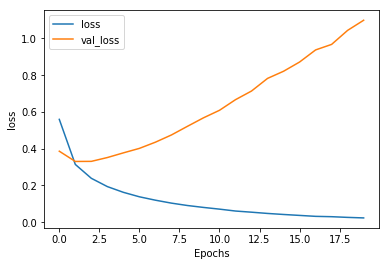

In [55]:
plot(history,"accuracy")
plot(history,"loss")